<html>
<body>
<h1 style="background-color: #bfafb2;
            display:fill;
            border-radius:15px;
            padding: 20px;
            text-align:center;
            letter-spacing:0.5px">
    <br><font size="+3.5">
    <font color=#000000><b>UC Davis Python for Data Analysis Course</b></font>
   </font>
    <br><font size="+2">
    <font color=#000000><b>Healthcare (Pharmaceutical Drug Spending) Data Analysis Project</b></font>
   </font>
    <br><font size="+1">
    <font color=#000000><b>Team Members:</b> Guadalupe, Jimmy, Krishan, and Leigherin </font> <br>
    <font color=#000000><b>Due Date:</b> 9/8/2024 </font>
   </font>
    </center>
</h1>
</body>
</html>



# **Data Source Overview: Pharmaceutical Drug Spending by Countries**

**The data set for this project can be found at:** https://www.kaggle.com/datasets/tunguz/pharmaceutical-drug-spending-by-countries/data

  https://datahub.io/core/population (cited in Kaggle page)


**NOTE**: For the purposes of this data set, "pharmaceuticals" and  "pharmaceutical spending" are defined as: prescription medicines and self-medication, often referred to as over-the-counter products. Pharmaceuticals consumed in hospitals and other health care settings are excluded.


This dataset consists of the following variables:

- **Location:** Country

- **Time:** Year

- **PC_HEALTHXP (Percent of Health Spending):** This column shows the percentage of a country’s total health expenditure that is spent on pharmaceuticals.

- **PC_GDP (Percent of GDP):** This column indicates the percentage of a country’s Gross Domestic Product (GDP) that is allocated to pharmaceutical spending.

- **USD_CAP (US Dollars per Capita):** This column provides the amount of money spent on pharmaceuticals per person, adjusted for purchasing power parity (PPP) to account for differences in cost of living between countries.

- **FLAG_CODES (Flag Codes):** Unknown; data source does not explain what data this column is capturing

- **TOTAL_SPEND (Total Spending):** This column represents the total pharmaceutical spending for each country. **Units are in 1 million.** “TOTAL_SPEND” is calculated using “US dollars per capita” and “population” data.

*Population data comes from DataHub http://datahub.io/core/population since it is regularly updated and includes all country codes.


Pharmaceutical drug spending is a critical aspect of healthcare economics, reflecting the costs associated with developing, manufacturing, and distributing medications. This is relevant because it directly impacts healthcare affordability, access, and innovation.

Rising drug costs can strain healthcare systems and patients, making it essential to understand and manage these expenses. Effective drug spending strategies can improve health outcomes and ensure sustainable health delivery.

The dataset being explored provides information related to Pharmaceutical drug expenditure across various nations over several years.  Pharmaceutical Drug Spending by countries with indicators such as a share of total health spending, in USD per capita (using economy-wide PPPs) and as a share of GDP. Plus, total spending by each countries in the specific year.

## **Project Objective**

- Examine pharmaceutical drug spending data to gain an understanding of how population size impacts drug spending in countries.

## **Hypothesis**

- We hypothesize that countries with larger populations spend more on pharmaceuticals than those with smaller populations.

- In other words we think that there is a relationship between Population and the Pharmaceutical Drug Spending.

- PC_HEALTHXP, PC_GDP, USD_CAP, TOTAL_SPEND provide different ways to look at spending, while LOCATION and TIME data can help us analyze how spending varies across location and increases across time.

**Dependent Variable and Independent Variable**


**Dependent Variable (Y):** The variable that we are trying to predict or explain. In our case, this would likely be Pharmaceutical Drug Spending (Total_Spend) data column in the data set.

**Independent Variable (X):** The variable that we believe has an effect on the dependent variable. In this context, this would be Population by Country. This variable will be derived from (Total_Spend) column.



<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
    <font color=#000000><b>&nbsp;&nbsp; Import Packages</b></font>
    </font>  <br>
</h2>
</html>

In [1]:
# Import packages needed for processing and analysis
# Pandas and NumPy
import numpy as np
import pandas as pd

# Ploting Packages
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
%matplotlib inline

# Linear Regression
import statsmodels.api as sm

<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
    <font color=#000000><b>&nbsp;&nbsp;Import Pharmaceutical Drug Spending Dataset</b></font>
    </font>  <br>
</h2>
</html>

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')


In [3]:
# # Import the Pharmaceutical Drug Spending by Countries dataset
# drugs = pd.read_csv('/content/drive/MyDrive/Pharmaceutical_Drug_Spending.csv')


In [4]:
drugs = pd.read_csv('Pharmaceutical_Drug_Spending.csv')

<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
    <font color=#000000><b>&nbsp;&nbsp;Exploratory Data Analysis</b></font>
    </font>  <br>
</h2>
</html>

## **Exploration # 1: Data Summary and Identify Categorical vs Numerical Columns**
We used drugs.info() along with drugs to get our first look at the phtsical data. We are interested in data types and general column chracteristics (e.g. numerical vs categorical data)

In [5]:
print(drugs.info())
drugs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036 entries, 0 to 1035
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LOCATION     1036 non-null   object 
 1   TIME         1036 non-null   int64  
 2   PC_HEALTHXP  1036 non-null   float64
 3   PC_GDP       1036 non-null   float64
 4   USD_CAP      1036 non-null   float64
 5   FLAG_CODES   63 non-null     object 
 6   TOTAL_SPEND  1036 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 56.8+ KB
None


LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND
0         AUS  1971       15.992   0.727   35.720        NaN       462.11
1         AUS  1972       15.091   0.686   36.056        NaN       475.11
2         AUS  1973       15.117   0.681   39.871        NaN       533.47
3         AUS  1974       14.771   0.755   47.559        NaN       652.65
4         AUS  1975       11.849   0.682   47.561        NaN       660.76
...       ...   ...          ...     ...      ...        ...          ...
1031      LTU  2012       28.942   1.820  448.728        NaN      1340.70
1032      LTU  2013       28.173   1.728  461.178        NaN      1364.02
1033      LTU  2014       27.836   1.724  485.245        NaN      1422.92
1034      LTU  2015       26.784   1.745  504.422        NaN      1465.30
1035      RUS  2015       22.939   1.286  309.900        NaN     44655.62

[1036 rows x 7 columns]

**Our Findings:**

1.   The dataset has 7 columns and 1036 rows of data.
2.   The LOCATION and FLAG_CODES columns are object data types which hints that they can be considered **categorical data** for our analysis. The TIME column, although an int64 data type, clearly represents year when we look at the data, and can be considered **categorical data** as well. A look at the physical data suggests all of the aforementioned is true.
3.   The PC_HEALTHXP, PC_GDP, USD_CAP, TOTAL_SPEND columns are float64 data types which hints that they can be considered **numerical data** for our analysis. A look at the physical data suggests this is true.
4.   The FLAG_CODES columns has only 63 non-null values, so 973 NaN values which means the dataset is missing a lot of data for this column. We will have to do further exploration to see if this columns is useable.
5.  All other columns do not have any NaN values.




## **Exploration # 2: Data Statistical Summary**
We used drugs.describe() to gather statistical information about each numerical column.

In [6]:
drugs.describe()

TIME  PC_HEALTHXP       PC_GDP      USD_CAP    TOTAL_SPEND
count  1036.000000  1036.000000  1036.000000  1036.000000    1036.000000
mean   1996.809846    16.406307     1.170948   295.046989   11765.423118
std      12.498330     6.389064     0.465635   209.152134   34878.286123
min    1970.000000     5.545000     0.207000     3.160000       6.290000
25%    1987.000000    11.516250     0.768250   111.098500     728.180000
50%    1999.000000    14.967500     1.141500   266.332000    2349.570000
75%    2007.000000    20.590500     1.523250   446.109500    7778.180000
max    2016.000000    40.239000     2.797000  1162.399000  373009.910000

**Our Findings:**
1.   The average values of PC_HEALTHXP, PC_GDP, USD_CAP, and TOTAL_SPEND are  16.40%, 1.17%, 295.046 USD, and 11765.42 million USD (11,765,420,000; TOTAL_SPEND is in units of 1 million USD) respectively.
2.   We also see the Min and Max values for each column per the table.
3.   These numbers give us a sense of range for each column in our data.


## **Exploration # 3: Unique Values**
We used drugs[column].unique() on each column to understand how many different unique values exist in each column.

In [7]:
print('Unique values for LOCATION:')
print(drugs['LOCATION'].unique(),'\n')

print('Unique values for TIME:')
print(drugs['TIME'].unique(),'\n')

print('Unique values for PC_HEALTHXP:')
print(drugs['PC_HEALTHXP'].unique(),'\n')

print('Unique values for PC_GDP:')
print(drugs['PC_GDP'].unique(),'\n')

print('Unique values for USD_CAP:')
print(drugs['USD_CAP'].unique(),'\n')

print('Unique values for TOTAL_SPEND:')
print(drugs['TOTAL_SPEND'].unique(),'\n')

print('Unique values for FLAG_CODES:')
print(drugs['FLAG_CODES'].unique(),'\n')


Unique values for LOCATION:
['AUS' 'AUT' 'BEL' 'CAN' 'CZE' 'DNK' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL'
 'IRL' 'ITA' 'JPN' 'KOR' 'LUX' 'MEX' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'SVK'
 'ESP' 'SWE' 'CHE' 'TUR' 'GBR' 'USA' 'EST' 'SVN' 'ISR' 'LVA' 'LTU' 'RUS'] 

Unique values for TIME:
[1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 1970 2016] 

Unique values for PC_HEALTHXP:
[15.992 15.091 15.117 ... 27.836 26.784 22.939] 

Unique values for PC_GDP:
[0.727 0.686 0.681 0.755 0.682 0.63  0.613 0.591 0.523 0.54  0.548 0.564
 0.58  0.569 0.599 0.582 0.595 0.623 0.677 0.739 0.778 0.819 0.859 0.882
 0.924 0.95  1.019 1.075 1.194 1.236 1.213 1.244 1.269 1.219 1.225 1.273
 1.334 1.324 1.315 1.336 1.32  1.306 0.784 0.78  0.801 0.84  0.852 0.854
 0.876 1.01  1.087 1.17  1.174 1.198 1.238 1.304 1.294 1.277 1.268 1.289
 1.311 1.271

**Our Findings:**

1.   There are 36 unique values for LOCATION. LOCATION is made up of 3 letter codes that represents countries. Although most of the codes seem intuitive, we will need to reference the Kaggle source data page to be sure we understand which 3 letter code represent what country.
2.   There are 47 unique values for TIME. TIME ranges from the year 1971 to 2016
3.   PC_HEALTHXP, PC_GDP, USD_CAP, TOTAL_SPEND all have many unique values, which is expected of numerical data. Physically seeing this confirms that there are unlikley any quality issues with these columns.
4.   FLAG_CODES contains 4 unique values; they are: 'B', 'D', 'P', and 'NaN.' NaN is not an actual value but indicated missing data.




## **Exploration # 4: Exploring FLAG_CODES column**
We want to explore the FLAG_CODES column more since we know it has so many NaN values. We want to determine if we can ignore this column in our analysis. We used drugs['FLAG_CODES'].value_counts to get a closer look at the data.

In [8]:
print(drugs['FLAG_CODES'].value_counts(dropna=False).sort_index(ascending=True),'\n')

print((drugs['FLAG_CODES'].value_counts(dropna=False).sort_index(ascending=True) / len(drugs))*100,'\n')

FLAG_CODES
B       46
D       11
P        6
NaN    973
Name: count, dtype: int64 

FLAG_CODES
B       4.440154
D       1.061776
P       0.579151
NaN    93.918919
Name: count, dtype: float64 



**Our Findings:**

1.   We find that out of the 1036 rows in our dataset, only 63 rows or ~6% have non-NULL values for FLAG_CODES.
2.   Since there are so many NaN values for this column, and the data source does not explain what this column means, **we have concluded that we can exclude the FLAG_CODES column from our analysis.**

## **Exploration # 5 Visualization of Numerical Variables in the Dataset**
As a follow up to previous explorations, we wanted to visually see the distributions of numerical data in our dataset. We used the matplotlib.pyplot package to plot the data into a histogram to see our data distribution.

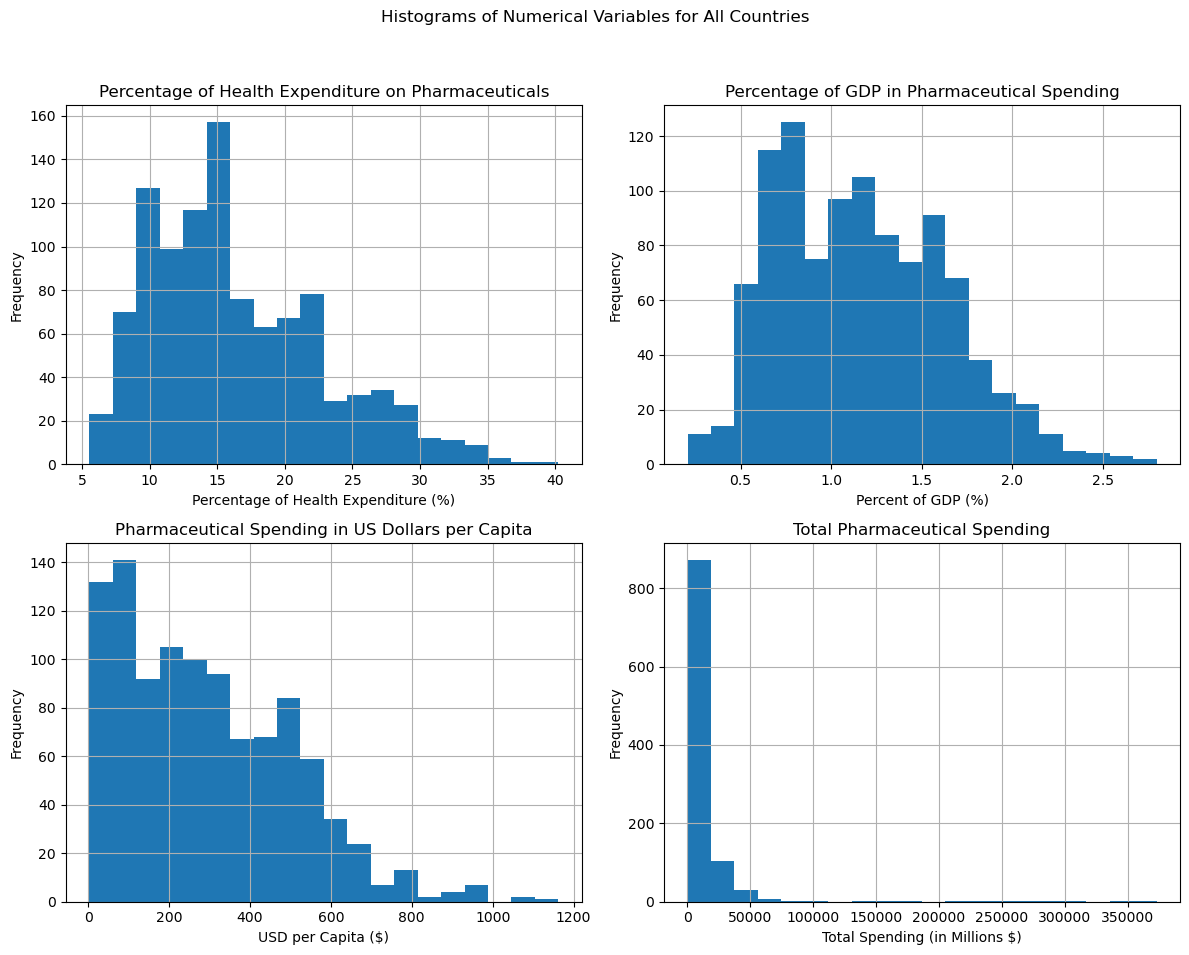

In [9]:
# Plot histogram of numerical variables in drugs dataset

# List of column names to use for x-axis labels and titles
columns = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']
x_labels = ['Percentage of Health Expenditure (%)', 'Percent of GDP (%)', 'USD per Capita ($)', 'Total Spending (in Millions $)']
titles = ['Percentage of Health Expenditure on Pharmaceuticals', 'Percentage of GDP in Pharmaceutical Spending', 'Pharmaceutical Spending in US Dollars per Capita', 'Total Pharmaceutical Spending']

# Plot histogram of numerical variables in drugs dataset
axes = drugs[columns].hist(bins=20, figsize=(12, 10))

# Add title for the entire figure
plt.suptitle('Histograms of Numerical Variables for All Countries')

# Add labels and titles for each subplot
for ax, column, x_label, title in zip(axes.flatten(), columns, x_labels, titles):
    ax.set_xlabel(x_label)  # Set x-axis label
    ax.set_ylabel('Frequency')  # Set y-axis label
    ax.set_title(title)  # Set the title of each histogram

# Adjust layout to make room for the suptitle
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show plot
plt.show()

**Our Findings:**
1.  This numerical data plotted as histograms provides a visualization of how the data is distributed by frequency of data points within certain ranges.

## **Exploration # 6 Missing Data**

Through our exploration process, we realized that the dataset was missing data - not in the sense of NaN values, but missing rows of data for certain LOCATION/TIME combinations. We wanted to see the extent of missing data.



As we started to plot the data as part of exploration, we realized that the dataset was missing data - not in the form of NaN values, but missing data entirely (e.g. if there was no observation for USA 1990, the dataset simply would not have a row for that).

We used the groupby('LOCATION').size() function to get a count of number of rows per country. We observed that we had very different number of rows per country in the dataset and our data was not uniform.

We then used plotyl.imshow() function to create a heatmap of the data to give us a visual representation of our findings.

That fact that we are missing so much data is something we will have to factor into our analysis in the next steps.




**Our Findings:**

1.   We observed that we had very different number of rows of data per country in the dataset; our data was not uniform. Almost every country was missing data for at least 1 year, only KOR and SWE had data present for all 47 years in the time range
2.   We  will need to factor in the fact that we are missing so much data into our analysis

**Some other observations we noted:**

1.   Russia only has a single row of data
2.   There are only 4 rows of data for TIME = 2016
3.   USA, which has the most spending by far as we easily see on the heatmap, only has data from 2000-2015, a relatively short timeframe compared to other countries in the data



In [10]:
#row count by country
count_by_location = drugs.groupby('LOCATION').size()
row_count_by_location = count_by_location.reset_index(name='Count_Of_Rows')

#create total row count value
row_count_total = count_by_location.sum()
row_count_total_formatted = pd.DataFrame({'LOCATION': ['Total'], 'Count_Of_Rows': [row_count_total]})

#Combine to show row count by country + a total row
row_count_total_final = pd.concat([row_count_by_location, row_count_total_formatted], ignore_index=True)
print(row_count_total_final)


   LOCATION  Count_Of_Rows
0       AUS             44
1       AUT             26
2       BEL             41
3       CAN             45
4       CHE             31
5       CZE             26
6       DEU             45
7       DNK             36
8       ESP             32
9       EST             17
10      FIN             46
11      FRA             30
12      GBR             31
13      GRC             27
14      HUN             22
15      IRL             41
16      ISL             46
17      ISR              8
18      ITA             29
19      JPN             32
20      KOR             47
21      LTU             12
22      LUX             21
23      LVA             12
24      MEX             17
25      NLD             43
26      NOR             47
27      NZL             24
28      POL             14
29      PRT             39
30      RUS              1
31      SVK             17
32      SVN             14
33      SWE             46
34      TUR             11
35      USA             16
3

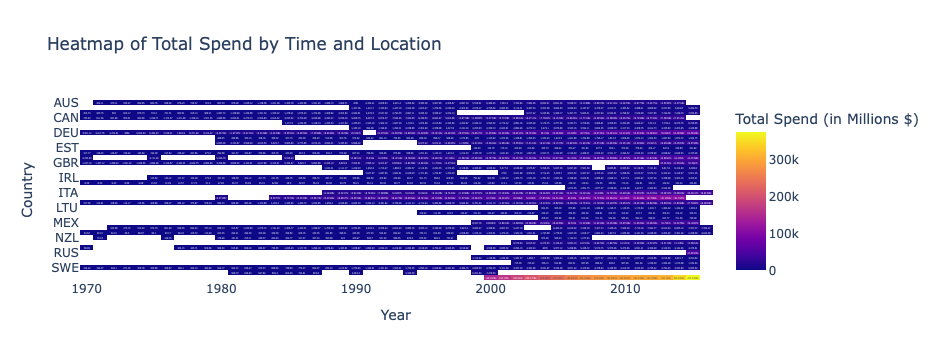

In [11]:
# Heatmap with Plotly Express

import plotly.express as px

crosstab = pd.crosstab(index=drugs['LOCATION'], columns=drugs['TIME'], values=drugs['TOTAL_SPEND'], aggfunc='sum')

fig = px.imshow(crosstab, text_auto=True,
                labels=dict(x='Year', y='Country', color='Total Spend (in Millions $)'),
                title='Heatmap of Total Spend by Time and Location')

fig.update_layout(plot_bgcolor='white')

fig.show()

## **Exploration # 7 Drug Spending by Country Over Time**
We used plotly to create a line chart to visualize Total Drug Spending by Country Over Time.

Plotly provides useful zoom and single country selection features which is useful since the visualization is so heavily skewed towards USA drug spending.

**Our Findings:**

1.   USA has the most spending by far when comparing to any other country during any year. USA skews the TOTAL_SPEND values.
2.   Japan and Germany also have high drug spending.


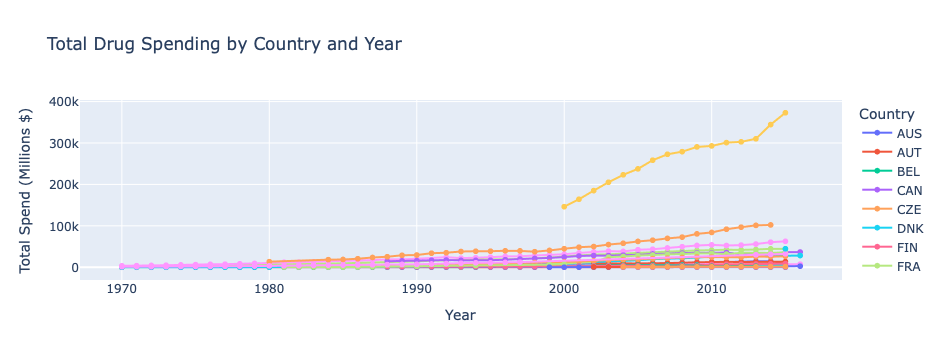

In [12]:
fig = px.line(drugs, x='TIME', y='TOTAL_SPEND', color='LOCATION',
              markers=True,
              title='Total Drug Spending by Country Over Time')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Total Spend (Millions $)',
    legend_title='Country',
    title='Total Drug Spending by Country and Year'
)
fig.show()

## **Exploration # 8 Time Series Analysis: Rolling Average of numerical** variables over time in US

In [13]:
# Filter the DataFrame for USA
country_code = 'USA'
drugs_usa = drugs[drugs['LOCATION'] == country_code].copy()

# Verify data
print(drugs_usa.head())
print(drugs_usa.describe())

    LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND
956      USA  2000       11.365   1.421  518.109        NaN    146190.88
957      USA  2001       11.729   1.545  575.975        NaN    164134.99
958      USA  2002       12.075   1.686  643.351        NaN    185043.96
959      USA  2003       12.327   1.782  707.226        NaN    205171.87
960      USA  2004       12.505   1.818  762.271        NaN    223196.99
              TIME  PC_HEALTHXP     PC_GDP      USD_CAP    TOTAL_SPEND
count    16.000000    16.000000  16.000000    16.000000      16.000000
mean   2007.500000    12.087438   1.837750   859.267875  261643.298750
std       4.760952     0.439590   0.168118   178.542697   63799.684185
min    2000.000000    11.365000   1.421000   518.109000  146190.880000
25%    2003.750000    11.823500   1.806000   748.509750  218690.710000
50%    2007.500000    12.151000   1.870000   911.558000  275903.455000
75%    2011.250000    12.417000   1.943500   964.572750  301394.1

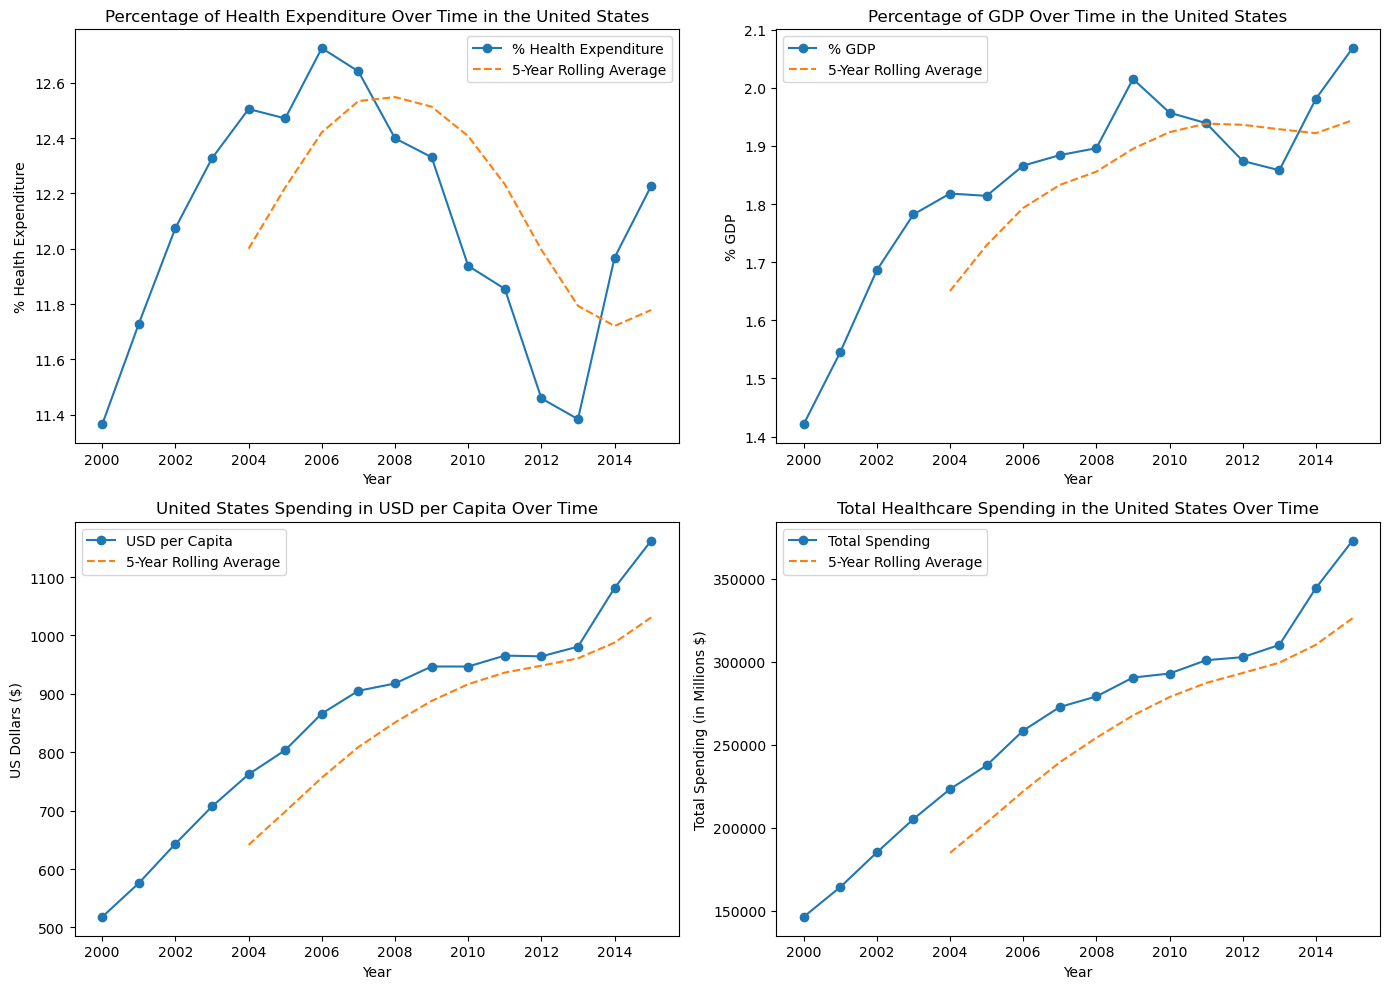

In [14]:
# Define rolling window size
window_size = 5

# Calculate rolling averages for the selected country
drugs_usa.loc[:, 'PC_HEALTHXP_ROLLING'] = drugs_usa.loc[:, 'PC_HEALTHXP'].rolling(window=window_size).mean()
drugs_usa.loc[:, 'PC_GDP_ROLLING'] = drugs_usa.loc[:, 'PC_GDP'].rolling(window=window_size).mean()
drugs_usa.loc[:, 'USD_CAP_ROLLING'] = drugs_usa.loc[:, 'USD_CAP'].rolling(window=window_size).mean()
drugs_usa.loc[:, 'TOTAL_SPEND_ROLLING'] = drugs_usa.loc[:, 'TOTAL_SPEND'].rolling(window=window_size).mean()


plt.figure(figsize=(14, 10))

# Plot PC_HEALTHXP
plt.subplot(2, 2, 1)
plt.plot(drugs_usa.loc[:, 'TIME'], drugs_usa.loc[:, 'PC_HEALTHXP'], label='% Health Expenditure', marker='o')
plt.plot(drugs_usa.loc[:, 'TIME'], drugs_usa.loc[:, 'PC_HEALTHXP_ROLLING'], label=f'{window_size}-Year Rolling Average', linestyle='--')
plt.title('Percentage of Health Expenditure Over Time in the United States')
plt.xlabel('Year')
plt.ylabel('% Health Expenditure')
plt.legend()

# Plot PC_GDP
plt.subplot(2, 2, 2)
plt.plot(drugs_usa.loc[:, 'TIME'], drugs_usa.loc[:, 'PC_GDP'], label='% GDP', marker='o')
plt.plot(drugs_usa.loc[:, 'TIME'], drugs_usa.loc[:, 'PC_GDP_ROLLING'], label=f'{window_size}-Year Rolling Average', linestyle='--')
plt.title('Percentage of GDP Over Time in the United States')
plt.xlabel('Year')
plt.ylabel('% GDP')
plt.legend()

# Plot USD_CAP
plt.subplot(2, 2, 3)
plt.plot(drugs_usa.loc[:, 'TIME'], drugs_usa.loc[:, 'USD_CAP'], label='USD per Capita', marker='o')
plt.plot(drugs_usa.loc[:, 'TIME'], drugs_usa.loc[:, 'USD_CAP_ROLLING'], label=f'{window_size}-Year Rolling Average', linestyle='--')
plt.title('United States Spending in USD per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('US Dollars ($)')
plt.legend()

# Plot TOTAL_SPEND
plt.subplot(2, 2, 4)
plt.plot(drugs_usa.loc[:, 'TIME'], drugs_usa.loc[:, 'TOTAL_SPEND'], label='Total Spending', marker='o')
plt.plot(drugs_usa.loc[:, 'TIME'], drugs_usa.loc[:, 'TOTAL_SPEND_ROLLING'], label=f'{window_size}-Year Rolling Average', linestyle='--')
plt.title('Total Healthcare Spending in the United States Over Time')
plt.xlabel('Year')
plt.ylabel('Total Spending (in Millions $)')
plt.legend()

plt.tight_layout()
plt.show()

**Our Findings:**
1.   This time series plot of each numerical variable helps to visualize trends in the data or any anomalies over the years in the United States.

##**Exploration # 9 Time Series Analysis: Rolling Average of numerical variables over time in US against other countries**

Initial code execution returned an error indicating there were missing values for variables in the dataset.

To correct this error, some data cleaning was performed to identify any missing variables or non-numeric values in the dataset.

In [15]:
# Inspect Data Types
print(drugs.dtypes)

LOCATION        object
TIME             int64
PC_HEALTHXP    float64
PC_GDP         float64
USD_CAP        float64
FLAG_CODES      object
TOTAL_SPEND    float64
dtype: object


In [16]:
# Inspect non-numeric values
for col in ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']:
    non_numeric = drugs[~drugs[col].apply(pd.to_numeric, errors='coerce').notna()]
    print(f"Non-numeric values in {col}:")
    print(non_numeric)

Non-numeric values in PC_HEALTHXP:
Empty DataFrame
Columns: [LOCATION, TIME, PC_HEALTHXP, PC_GDP, USD_CAP, FLAG_CODES, TOTAL_SPEND]
Index: []
Non-numeric values in PC_GDP:
Empty DataFrame
Columns: [LOCATION, TIME, PC_HEALTHXP, PC_GDP, USD_CAP, FLAG_CODES, TOTAL_SPEND]
Index: []
Non-numeric values in USD_CAP:
Empty DataFrame
Columns: [LOCATION, TIME, PC_HEALTHXP, PC_GDP, USD_CAP, FLAG_CODES, TOTAL_SPEND]
Index: []
Non-numeric values in TOTAL_SPEND:
Empty DataFrame
Columns: [LOCATION, TIME, PC_HEALTHXP, PC_GDP, USD_CAP, FLAG_CODES, TOTAL_SPEND]
Index: []


In [17]:
# Convert columns to numeric, forcing errors to NaN
for col in ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']:
    drugs[col] = pd.to_numeric(drugs[col], errors='coerce')

Once the data was cleaned, two new copies of the dataset were created to include other countries and combined country data (USA & other countries).

In [18]:
# Filter data for other countries
drugs_others = drugs[drugs['LOCATION'] != 'USA'].copy()

# Calculate yearly averages for other countries
drugs_others_avg = drugs_others.groupby('TIME').mean(numeric_only=True).reset_index()

# Merge USA data with average data for other countries
drugs_combined = pd.merge(drugs_usa, drugs_others_avg, on='TIME', suffixes=('_USA', '_AVG'))


Plotting the histograms for each numerical variable with combined data and rolling averages for both USA and other countries.

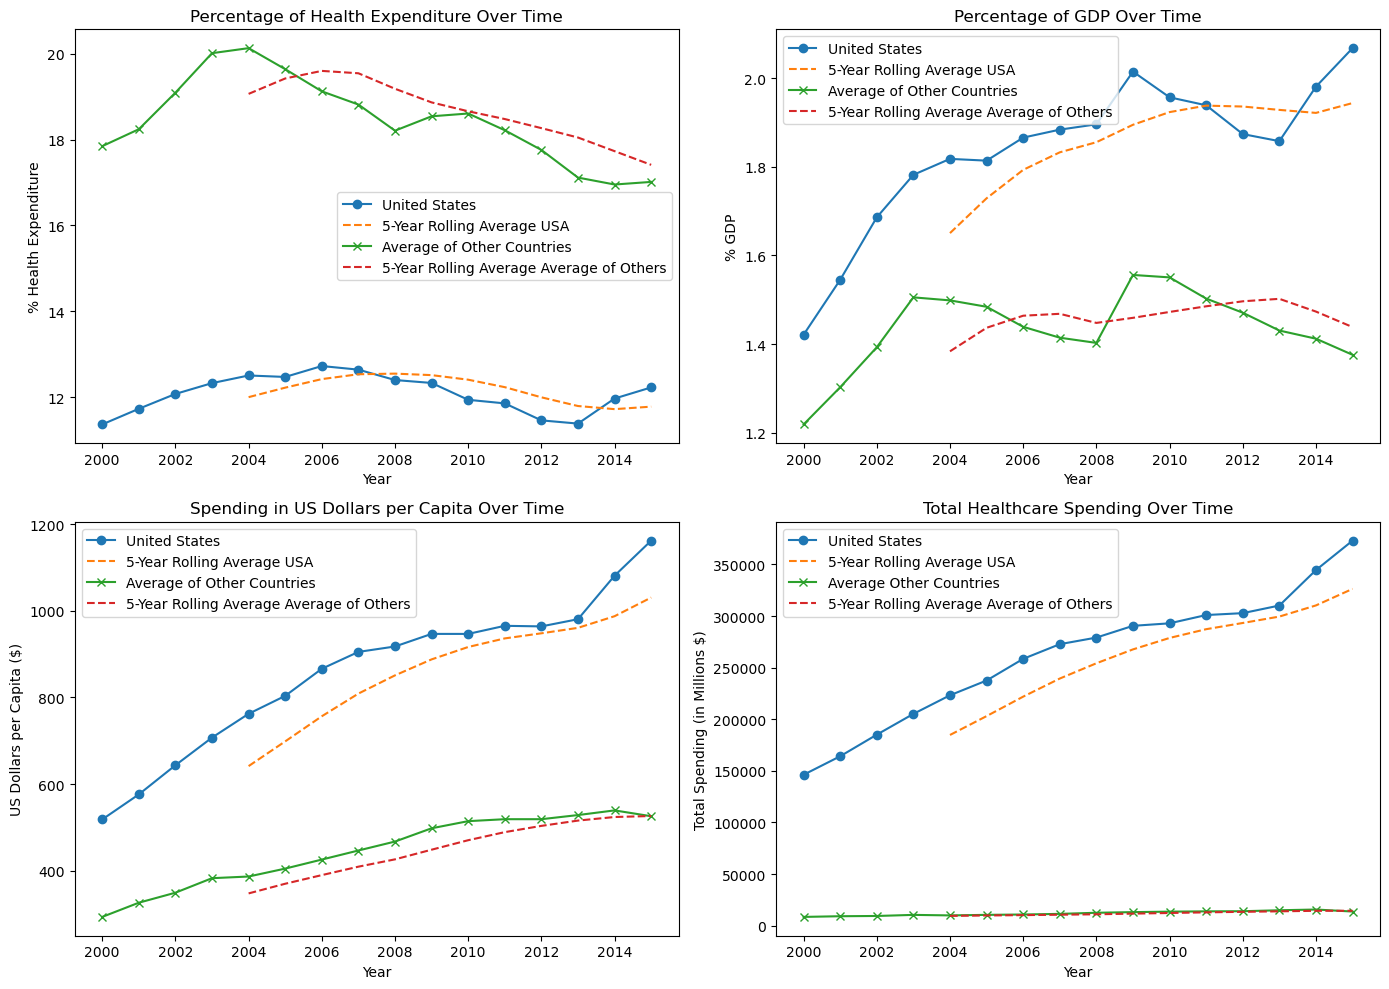

In [19]:
# Define rolling window size
window_size = 5

# Calculate rolling averages
drugs_combined['PC_HEALTHXP_ROLLING_USA'] = drugs_combined['PC_HEALTHXP_USA'].rolling(window=window_size).mean()
drugs_combined['PC_HEALTHXP_ROLLING_AVG'] = drugs_combined['PC_HEALTHXP_AVG'].rolling(window=window_size).mean()

drugs_combined['PC_GDP_ROLLING_USA'] = drugs_combined['PC_GDP_USA'].rolling(window=window_size).mean()
drugs_combined['PC_GDP_ROLLING_AVG'] = drugs_combined['PC_GDP_AVG'].rolling(window=window_size).mean()

drugs_combined['USD_CAP_ROLLING_USA'] = drugs_combined['USD_CAP_USA'].rolling(window=window_size).mean()
drugs_combined['USD_CAP_ROLLING_AVG'] = drugs_combined['USD_CAP_AVG'].rolling(window=window_size).mean()

drugs_combined['TOTAL_SPEND_ROLLING_USA'] = drugs_combined['TOTAL_SPEND_USA'].rolling(window=window_size).mean()
drugs_combined['TOTAL_SPEND_ROLLING_AVG'] = drugs_combined['TOTAL_SPEND_AVG'].rolling(window=window_size).mean()

# Set figure size
plt.figure(figsize=(14, 10))

# Plot PC_HEALTHXP
plt.subplot(2, 2, 1)
plt.plot(drugs_combined['TIME'], drugs_combined['PC_HEALTHXP_USA'], label='United States', marker='o')
plt.plot(drugs_combined['TIME'], drugs_combined['PC_HEALTHXP_ROLLING_USA'], label=f'{window_size}-Year Rolling Average USA', linestyle='--')
plt.plot(drugs_combined['TIME'], drugs_combined['PC_HEALTHXP_AVG'], label='Average of Other Countries', marker='x')
plt.plot(drugs_combined['TIME'], drugs_combined['PC_HEALTHXP_ROLLING_AVG'], label=f'{window_size}-Year Rolling Average Average of Others', linestyle='--')
plt.title('Percentage of Health Expenditure Over Time')
plt.xlabel('Year')
plt.ylabel('% Health Expenditure')
plt.legend()

# Plot PC_GDP
plt.subplot(2, 2, 2)
plt.plot(drugs_combined['TIME'], drugs_combined['PC_GDP_USA'], label='United States', marker='o')
plt.plot(drugs_combined['TIME'], drugs_combined['PC_GDP_ROLLING_USA'], label=f'{window_size}-Year Rolling Average USA', linestyle='--')
plt.plot(drugs_combined['TIME'], drugs_combined['PC_GDP_AVG'], label='Average of Other Countries', marker='x')
plt.plot(drugs_combined['TIME'], drugs_combined['PC_GDP_ROLLING_AVG'], label=f'{window_size}-Year Rolling Average Average of Others', linestyle='--')
plt.title('Percentage of GDP Over Time')
plt.xlabel('Year')
plt.ylabel('% GDP')
plt.legend()

# Plot USD_CAP
plt.subplot(2, 2, 3)
plt.plot(drugs_combined['TIME'], drugs_combined['USD_CAP_USA'], label='United States', marker='o')
plt.plot(drugs_combined['TIME'], drugs_combined['USD_CAP_ROLLING_USA'], label=f'{window_size}-Year Rolling Average USA', linestyle='--')
plt.plot(drugs_combined['TIME'], drugs_combined['USD_CAP_AVG'], label='Average of Other Countries', marker='x')
plt.plot(drugs_combined['TIME'], drugs_combined['USD_CAP_ROLLING_AVG'], label=f'{window_size}-Year Rolling Average Average of Others', linestyle='--')
plt.title('Spending in US Dollars per Capita Over Time')
plt.xlabel('Year')
plt.ylabel('US Dollars per Capita ($)')
plt.legend()

# Plot TOTAL_SPEND
plt.subplot(2, 2, 4)
plt.plot(drugs_combined['TIME'], drugs_combined['TOTAL_SPEND_USA'], label='United States', marker='o')
plt.plot(drugs_combined['TIME'], drugs_combined['TOTAL_SPEND_ROLLING_USA'], label=f'{window_size}-Year Rolling Average USA', linestyle='--')
plt.plot(drugs_combined['TIME'], drugs_combined['TOTAL_SPEND_AVG'], label='Average Other Countries', marker='x')
plt.plot(drugs_combined['TIME'], drugs_combined['TOTAL_SPEND_ROLLING_AVG'], label=f'{window_size}-Year Rolling Average Average of Others', linestyle='--')
plt.title('Total Healthcare Spending Over Time')
plt.xlabel('Year')
plt.ylabel('Total Spending (in Millions $)')
plt.legend()

plt.tight_layout()
plt.show()

**Our Findings:**

The histograms show that overall the United States (US) deviates from the average of the other countries included in the dataset. Some interesting conclusions at first glance:

- Overall, the US spends less of it's health spending on pharmaceuticals compared to the average of the other countries
- GDP allocated to pharmaceutical spending is overall higher in the US than the average of other countries
- The USD spent per capita in the US is higher than the average spent per capita in other countries
- Overall pharmaceutical spending over time in the US population is much higher and has an upward growth trajectory compared to the average of other countries where the spending has remained relativley unchanged and lower over time.

The plotting range for Year is limited to years where there were valid (non-NaN) values. If the rolling averages for the initial years in the dataset are NaN, they won't appear in the plot.

## **Exploration # 10 Correlelogram**
We want to get a sense of any correlation between our variables so we used the seaborne pairplot() function to create a Correlelogram.

In order to incorporate Location into our chart, we use the hue and palette parameters which assigns each country a color. While we are seeing some correlation, we notice USA plots are skewing the data.

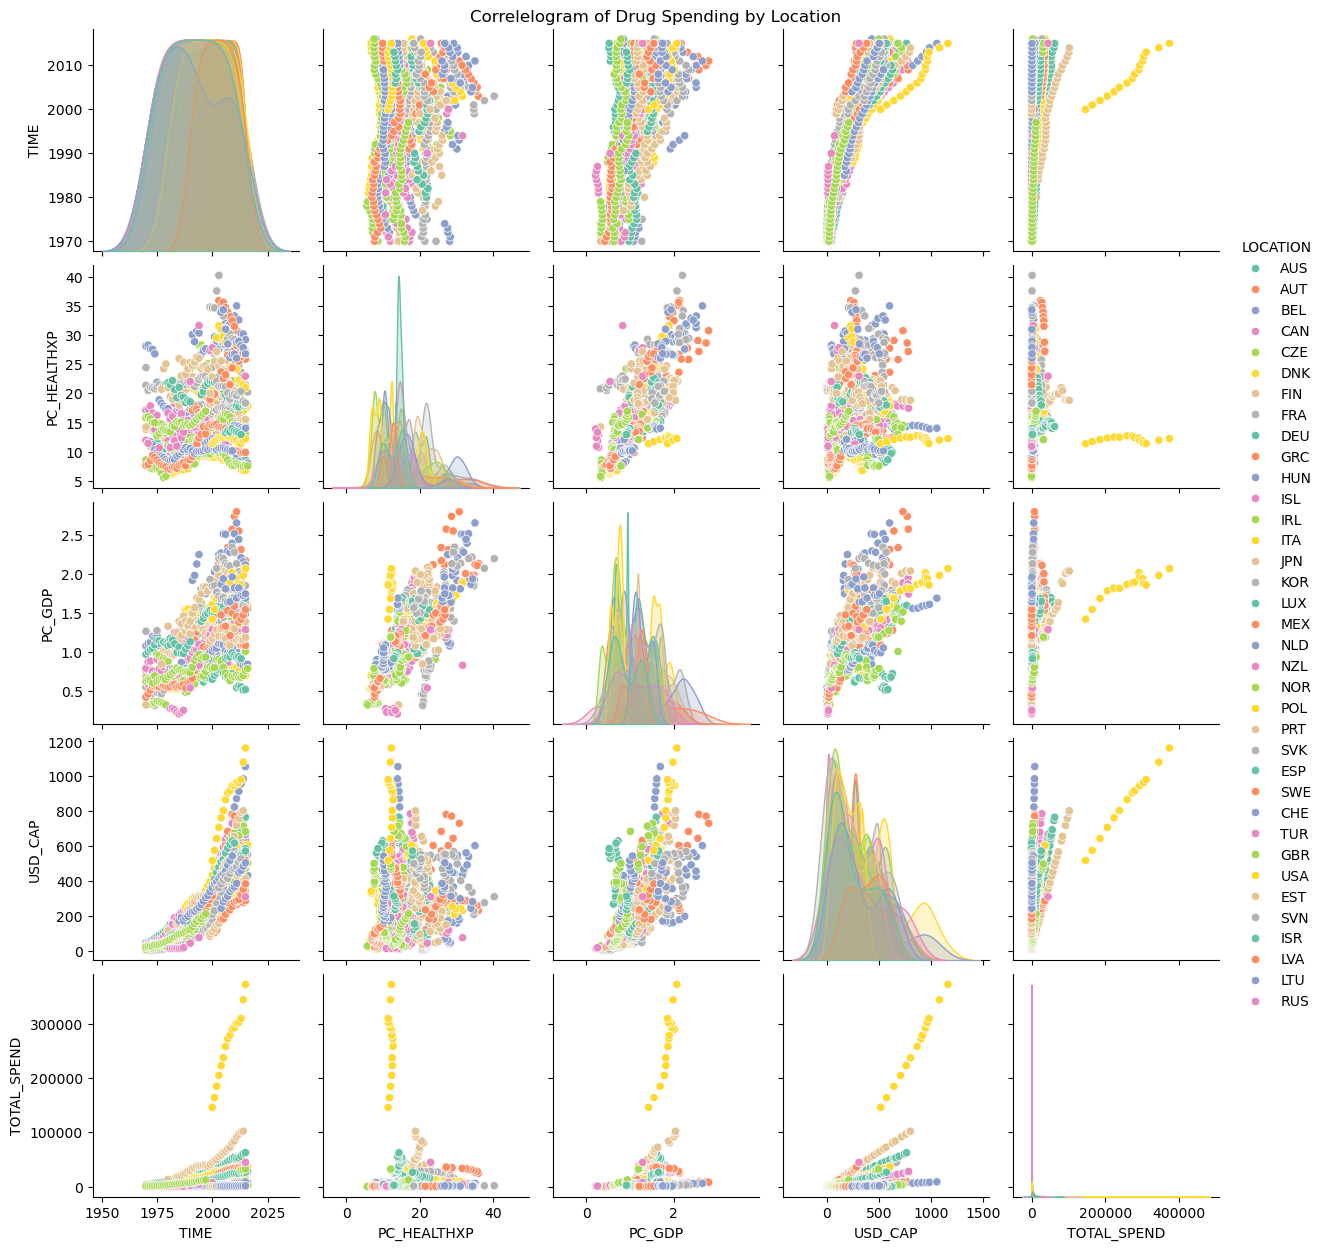

In [20]:
sns.pairplot(drugs, hue="LOCATION", palette="Set2")
plt.suptitle('Correlelogram of Drug Spending by Location', y=1)
plt.show()

We would like to see the correlogram without USA.
Although the data is still very spread out, we do see some positive correlation between USD_CAP & TIME, PC_GDP & PC_HEALTHXP, and USD_CAP & PC_GDP.



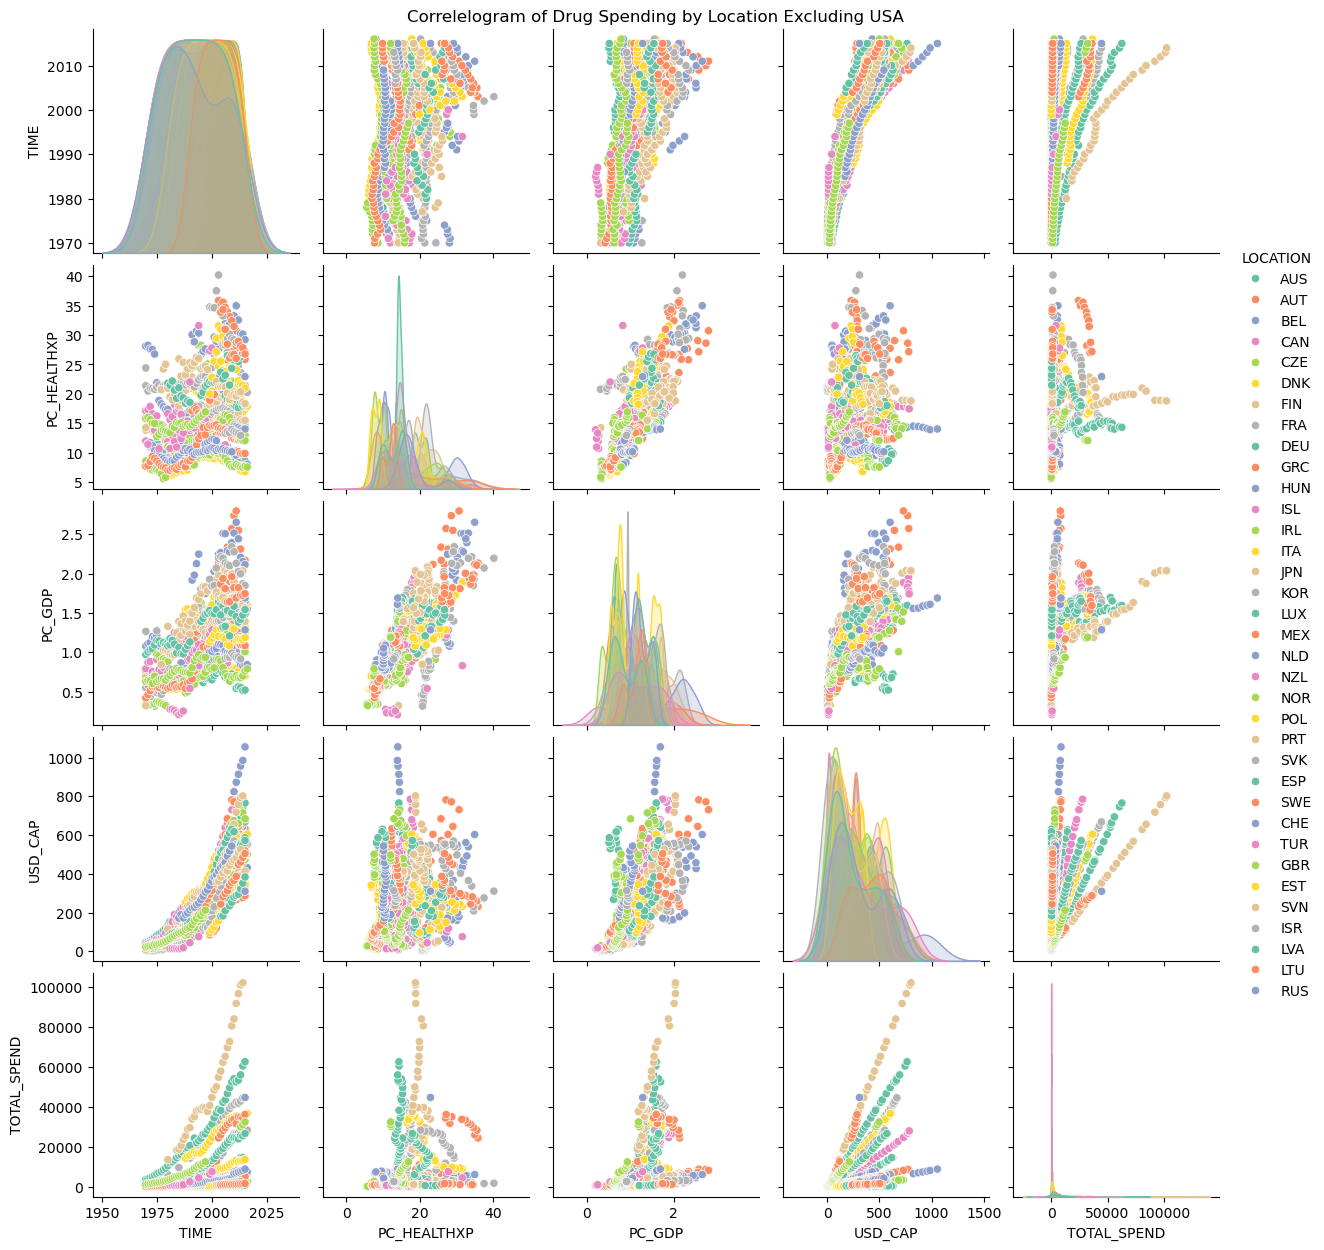

In [21]:
drugs_less_USA = drugs[drugs['LOCATION'] != 'USA']
sns.pairplot(drugs_less_USA, hue="LOCATION", palette="Set2")
plt.suptitle('Correlelogram of Drug Spending by Location Excluding USA', y=1)

plt.show()



**Our Findings:**

1.   We see some positive correlation between TIME + TOTAL_SPEND, TIME + USD_CAP, and TIME + PC_GDP.
2.   We see some positive correlation between PC_HEALTHXP + PC_GDP and PC_HEALTHXP + USD_CAP.
3.   We see some positive correlation between PC_GDP + TOTAL_SPEND, and PC_GDP + USD_CAP.
4.   We see some positive correlation between USD_CAP + TOTAL_SPEND.


<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
<font color=#000000><b>&nbsp;&nbsp; Data Cleaning</b></font>
    </font>  <br>
</h2>
</html>

Through our Data Explorations, we realized we needed to clean our data by additional columns. To start we use drugs.copy() to create a copy of our dataframe that we will modify.

In [22]:
#create copy of drugs df
drugs_cleaned = drugs.copy()

## **Add Column USD_TOTAL_SPEND**
TOTAL_SPEND column is in unints of 1 million. We are creating a new column, USD_TOTAL_SPEND, where it will be in units of 1 so that we can consider the columns in terms of USD.

In [23]:
#multiplying TOTAL_SPEND by 1 million to get USD_TOTAL_SPEND
drugs_cleaned['USD_TOTAL_SPEND'] = (drugs_cleaned['TOTAL_SPEND']*1000000)
#changing type to int for formatting display
drugs_cleaned['USD_TOTAL_SPEND'] = drugs_cleaned['USD_TOTAL_SPEND'].astype(int)

print(drugs_cleaned.head())

  LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND  \
0      AUS  1971       15.992   0.727   35.720        NaN       462.11   
1      AUS  1972       15.091   0.686   36.056        NaN       475.11   
2      AUS  1973       15.117   0.681   39.871        NaN       533.47   
3      AUS  1974       14.771   0.755   47.559        NaN       652.65   
4      AUS  1975       11.849   0.682   47.561        NaN       660.76   

   USD_TOTAL_SPEND  
0        462110000  
1        475110000  
2        533470000  
3        652650000  
4        660760000  


## **Add Column: POPULATION**


Per the Kaggle data source page: "'TOTAL_SPEND' is calculated using 'US dollars per capita' (USD_CAP) and 'population' data."

Knowing this, it is easy to derive population figures for each country/year with the USD_CAP and TOTAL_SPEND columns. We compared our population figures with the given data source in Kaggle and confirmed our method provided accurate population figures.

In [24]:
#USD_TOTAL_SPEND divided by USD_CAP to get population
drugs_cleaned.loc[:, 'POPULATION'] = (drugs_cleaned['USD_TOTAL_SPEND'] / drugs_cleaned['USD_CAP']).round(0)
#changing type to int for formatting display
drugs_cleaned['POPULATION'] = drugs_cleaned['POPULATION'].astype(int)

display(drugs_cleaned)

LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND  \
0         AUS  1971       15.992   0.727   35.720        NaN       462.11   
1         AUS  1972       15.091   0.686   36.056        NaN       475.11   
2         AUS  1973       15.117   0.681   39.871        NaN       533.47   
3         AUS  1974       14.771   0.755   47.559        NaN       652.65   
4         AUS  1975       11.849   0.682   47.561        NaN       660.76   
...       ...   ...          ...     ...      ...        ...          ...   
1031      LTU  2012       28.942   1.820  448.728        NaN      1340.70   
1032      LTU  2013       28.173   1.728  461.178        NaN      1364.02   
1033      LTU  2014       27.836   1.724  485.245        NaN      1422.92   
1034      LTU  2015       26.784   1.745  504.422        NaN      1465.30   
1035      RUS  2015       22.939   1.286  309.900        NaN     44655.62   

      USD_TOTAL_SPEND  POPULATION  
0           462110000    12937010  
1           475110000    13177002  
2           533470000    13379900  
3           652650000    13722955  
4           660760000    13892895  
...               ...         ...  
1031       1340700000     2987779  
1032       1364020000     2957687  
1033       1422920000     2932374  
1034       1465300000     2904909  
1035      44655620000   144096870  

[1036 rows x 9 columns]

## **Add Column: COUNTRY**

In [25]:
# Define a dictionary to map LOCATION codes to countries
location_code_to_country = {
    'AUS': 'Australia',
    'AUT': 'Austria',
    'BEL': 'Belgium',
    'CAN': 'Canada',
    'CZE': 'Czech Republic',
    'DNK': 'Denmark',
    'FIN': 'Finland',
    'FRA': 'France',
    'DEU': 'Germany',
    'GRC': 'Greece',
    'HUN': 'Hungary',
    'ISL': 'Iceland',
    'IRL': 'Ireland',
    'ITA': 'Italy',
    'JPN': 'Japan',
    'KOR': 'South_Korea',
    'LUX': 'Luxembourg',
    'MEX': 'Mexico',
    'NLD': 'Netherlands',
    'NZL': 'New Zealand',
    'NOR': 'Norway',
    'POL': 'Poland',
    'PRT': 'Portugal',
    'SVK': 'Slovakia',
    'ESP': 'Spain',
    'SWE': 'Sweden',
    'CHE': 'Switzerland',
    'TUR': 'Turkey',
    'GBR': 'United Kingdom',
    'USA': 'United States',
    'SVN': 'Slovenia',
    'ISR': 'Israel',
    'LVA': 'Latvia',
    'EST': 'Estonia',
    'RUS': 'Russia',
    'CHL': 'Chile',
    'LTU': 'Lithuania',
}

# Create a new column 'Continent' based on the 'Location' column
drugs_cleaned['COUNTRY'] = drugs_cleaned['LOCATION'].map(location_code_to_country)
display(drugs_cleaned)

LOCATION  TIME  PC_HEALTHXP  PC_GDP  USD_CAP FLAG_CODES  TOTAL_SPEND  \
0         AUS  1971       15.992   0.727   35.720        NaN       462.11   
1         AUS  1972       15.091   0.686   36.056        NaN       475.11   
2         AUS  1973       15.117   0.681   39.871        NaN       533.47   
3         AUS  1974       14.771   0.755   47.559        NaN       652.65   
4         AUS  1975       11.849   0.682   47.561        NaN       660.76   
...       ...   ...          ...     ...      ...        ...          ...   
1031      LTU  2012       28.942   1.820  448.728        NaN      1340.70   
1032      LTU  2013       28.173   1.728  461.178        NaN      1364.02   
1033      LTU  2014       27.836   1.724  485.245        NaN      1422.92   
1034      LTU  2015       26.784   1.745  504.422        NaN      1465.30   
1035      RUS  2015       22.939   1.286  309.900        NaN     44655.62   

      USD_TOTAL_SPEND  POPULATION    COUNTRY  
0           462110000    12937010  Australia  
1           475110000    13177002  Australia  
2           533470000    13379900  Australia  
3           652650000    13722955  Australia  
4           660760000    13892895  Australia  
...               ...         ...        ...  
1031       1340700000     2987779  Lithuania  
1032       1364020000     2957687  Lithuania  
1033       1422920000     2932374  Lithuania  
1034       1465300000     2904909  Lithuania  
1035      44655620000   144096870     Russia  

[1036 rows x 10 columns]

<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
<font color=#000000><b>&nbsp;&nbsp; Data Visualizations</b></font>
    </font>  <br>
</h2>
</html>



We Performed EDA to understand the trends and distributions within this dataset:

Trend Analysis: Examine how USD_CAP and TOTAL_SPEND have changed over time.

Correlation Analysis: Investigate the relationship between GDP and health spending metrics.

Location-specific Analysis: Check if there are significant differences in health spending patterns across different locations.

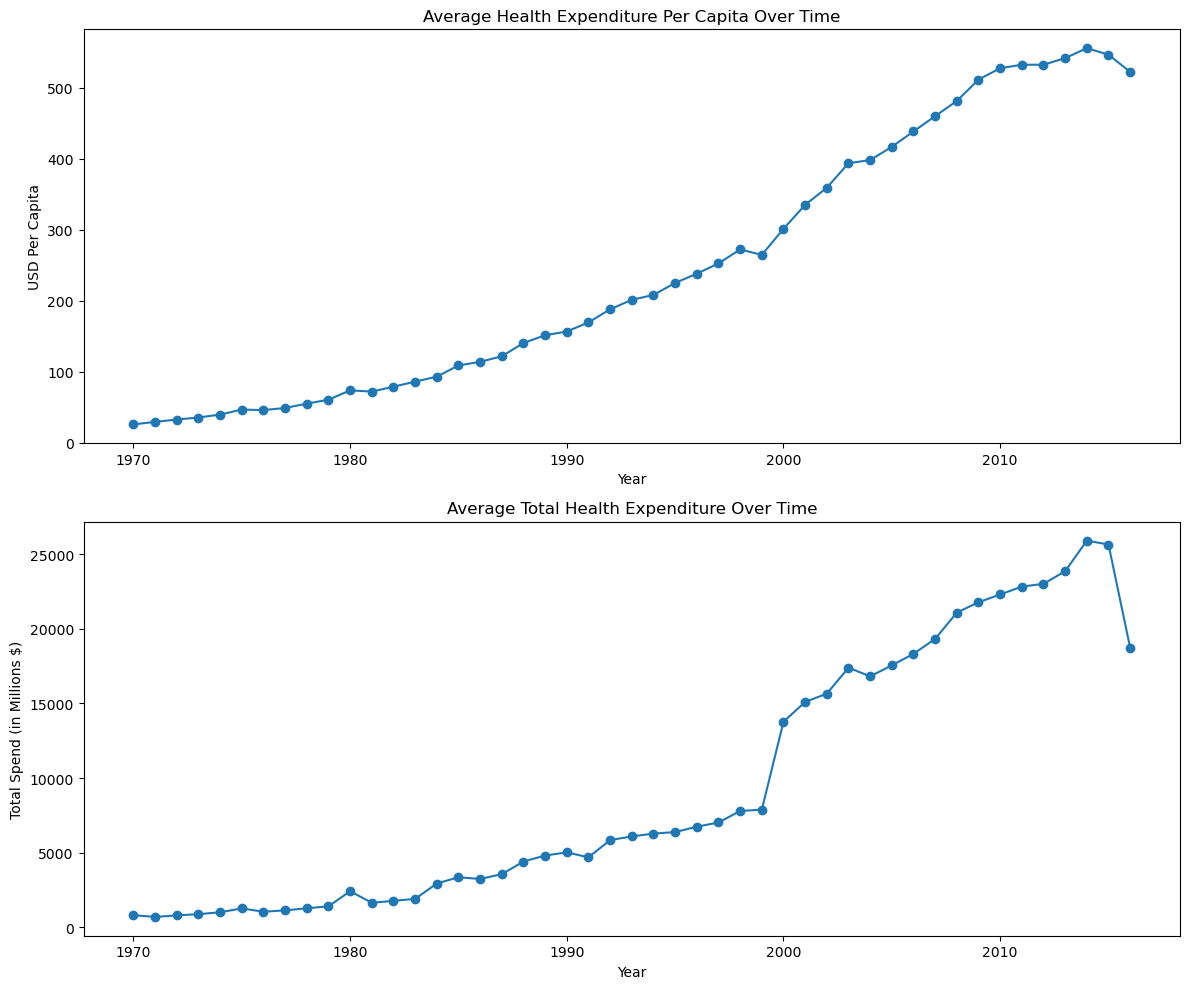

In [26]:
# Trend analysis of USD_CAP and TOTAL_SPEND over time
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot USD_CAP over time
drugs.groupby('TIME')['USD_CAP'].mean().plot(ax=ax[0], marker='o', linestyle='-')
ax[0].set_title('Average Health Expenditure Per Capita Over Time')
ax[0].set_ylabel('USD Per Capita')
ax[0].set_xlabel('Year')

# Plot TOTAL_SPEND over time
drugs.groupby('TIME')['TOTAL_SPEND'].mean().plot(ax=ax[1], marker='o', linestyle='-')
ax[1].set_title('Average Total Health Expenditure Over Time')
ax[1].set_ylabel('Total Spend (in Millions $)')
ax[1].set_xlabel('Year')

plt.tight_layout()
plt.show()

## **Visualization Of Total Drug Spending by Country**


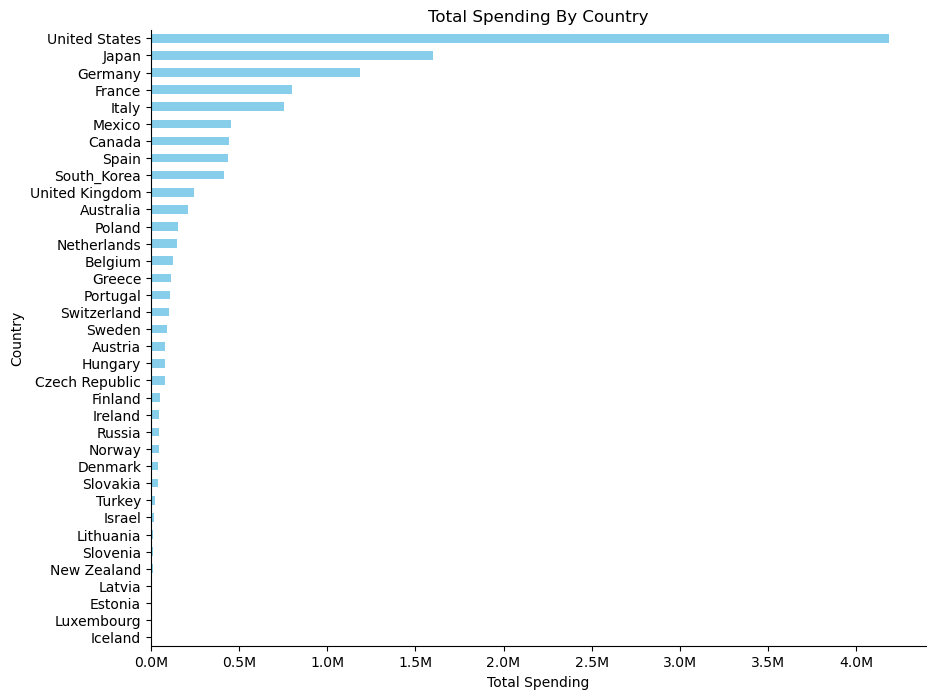

In [27]:
# Grouping and summing data
SpendingByCountry = drugs_cleaned.groupby('COUNTRY')['TOTAL_SPEND'].sum().sort_values(ascending=True)

# Plotting
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
SpendingByCountry.plot(kind='barh', ax=axs, color='skyblue')

# Setting titles and labels
axs.set_title('Total Spending By Country')
axs.set_xlabel('Total Spending')
axs.set_ylabel('Country')
axs.spines["right"].set_visible(False)
axs.spines["top"].set_visible(False)

# Remove right and top spines
axs.spines['right'].set_visible(False)
axs.spines['top'].set_visible(False)

# Convert x-axis labels to millions
labels = axs.get_xticks()
axs.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x / 1_000_000:.1f}M'))

plt.show()



**Our Findings:**

1.  USA, Japan and Germany spend the most in drugs
according to the viz above.
2.  USA stands out as an outlier, spending significantly more than other nations like Australia, Canada, and European countries


<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
<font color=#000000><b>&nbsp;&nbsp; Data Modeling</b></font>
    </font>  <br>
</h2>
</html>


# **DATA MODEL #1 - Linear Regression**

To test our main hypothesis, we will perform a regression analysis to examine the relationship between TOTAL_SPEND and POPULATION.

This analysis will help us understand whether and how TOTAL_SPEND varies with changes in POPULATION.


***Note: As with the dataset itself, in this regression analysis, TOTAL_SPEND is in units of Millions $.***

<b>Linear Regression Equation<b>

\begin{equation}
\hat{TOTALSPEND} = {\beta}_0 + {\beta}_1 * (Population) \end{equation}

In [28]:
#Linear Regression Model #1
import statsmodels.api as sm
# Dropping rows with NaN values in the relevant columns
##cleaned_df = drug_spending_df.dropna(subset=['Population', 'TOTAL_SPEND'])

# Independent variable (Population Growth) and Dependent variable (Total Spend)

y = drugs_cleaned['TOTAL_SPEND']
x = drugs_cleaned[['POPULATION']]

# Add a constant to the model (intercept)
x = sm.add_constant(x)

# Fit the regression model using statsmodels
model = sm.OLS(y, x).fit()

# Get the summary of the regression model
model_summary = model.summary()

# Print the summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:            TOTAL_SPEND   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     3524.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:49:59   Log-Likelihood:                -11537.
No. Observations:                1036   AIC:                         2.308e+04
Df Residuals:                    1034   BIC:                         2.309e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7926.6140    613.752    -12.915      0.0

\begin{equation}
\hat{TOTALSPEND}_i = -7926.6140 + 0.0007 * (Population) \end{equation}

***Note: TOTAL_SPEND is in units of Millions $.***

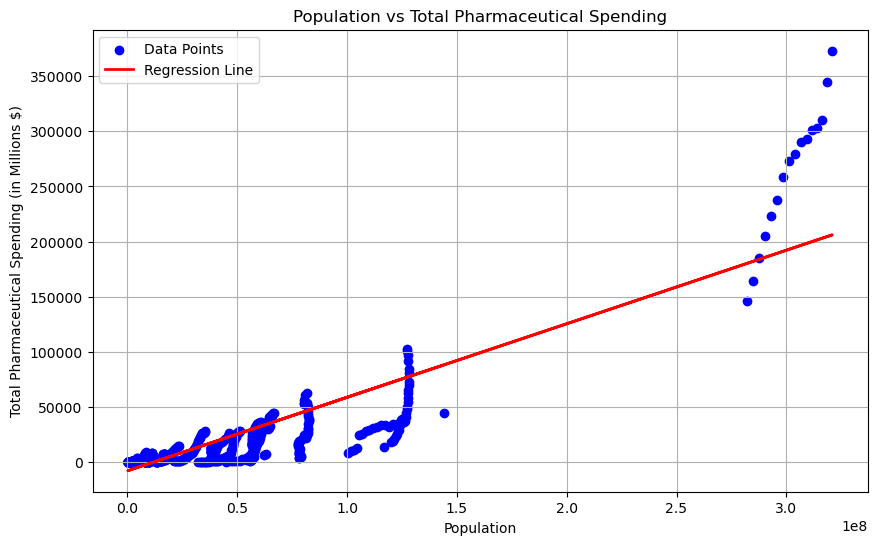

In [29]:
# Scatter plot of Population Growth vs Total Spend
plt.figure(figsize=(10, 6))
plt.scatter(drugs_cleaned['POPULATION'], drugs_cleaned['TOTAL_SPEND'], color='blue', label='Data Points')

# Plotting the regression line
plt.plot(drugs_cleaned['POPULATION'], model.predict(x), color='red', linewidth=2, label='Regression Line')

# Adding labels and title
plt.xlabel('Population')
plt.ylabel('Total Pharmaceutical Spending (in Millions $)')
plt.title('Population vs Total Pharmaceutical Spending')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## **Summary**

**Intercept (const: -7926.6140)**: This coefficient represents the estimated total spending when the population is zero. The negative value isn't practically meaningful, as a population of zero wouldn't have any spending. However, it does suggest that the model estimates lower total spending at smaller population sizes.


**The Coefficient of Population shows at 0.0007** and this number indicates that for every unit increase of population(e.g. each person added) then the total spending increases by 0.0007 Millions USD -- or 700 USD (because Total SPend is in units of 1 million). This positive relationship is significant and substantial, showing that larger populations are strongly associated with higher total pharmaceutical spending.

**P-value for Population (0.000):** The very low p-value (less than 0.001) for the population coefficient indicates that the relationship between population and total spending is statistically significant. This means we can confidently reject the null hypothesis that there is no relationship between population and total pharmaceutical spending.

**Comments:**

The linear regression analysis shows a strong and significant relationship between population size and total pharmaceutical spending, with the model explaining a substantial portion of the variation in spending.

I think this can inform budget allocations and resource planning in public health sectors.

<br>

<b>Based on the OLS regression, we can say with a significance level of less than .001 <br> that on average, an increase by one person in population is associated with a $700 increase in total pharmaceutical spending, all else constant.<b><br>



# **DATA MODEL #2 - Linear Regression**



While our hypothesis is primarily looking at how Population correlates with Total Spending, we also wanted to examine the relationship between other variables and TOTAL_SPEND.

We added PC_HEALTHXP (Percentage of Health Expenditure) and PC_GDP (Percentage of GDP) to our existing regression analysis. We did not include USD_CAP since that value is derived from TOTAL_SPEND and POPULATION.

This analysis will help us understand whether and how TOTAL_SPEND varies with changes in POPULATION, PC_HEALTHXP, and PC_GDP.


<b>Linear Regression Equation<b>

\begin{equation}
\hat{TOTALSPEND} = {\beta}_0 + {\beta}_1 * (Population) + {\beta}_2 * (pcGDP) + {\beta}_3 * (pcHEALTHXP)  \end{equation}

***Note: TOTAL_SPEND is in units of Millions $.***

In [30]:
import statsmodels.api as sm

#define predictor and response variables
y = drugs_cleaned['TOTAL_SPEND']
##x = drugs_cleaned['PC_HEALTHXP']
x = drugs_cleaned[['POPULATION', 'PC_GDP','PC_HEALTHXP']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            TOTAL_SPEND   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1643.
Date:                Sun, 08 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:49:59   Log-Likelihood:                -11397.
No. Observations:                1036   AIC:                         2.280e+04
Df Residuals:                    1032   BIC:                         2.282e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6391.7578   1317.942     -4.850      

<b>Linear Regression Equation<b>

\begin{equation}
\hat{TOTALSPEND} = -6391.7578 + 0.0006 * (Population) + 24240 * (pcGDP) + (-1740.2811) * (pcHEALTHXP)  \end{equation}

## **Summary**

**Intercept (const: −6391.7578)**: This coefficient represents the estimated total spending when the population is zero. The negative value isn't practically meaningful, as a population of zero wouldn't have any spending. However, it does suggest that the model estimates lower total spending at smaller population sizes, lower % GDP, and lower % Health Expenditure.


**The Coefficient of Population shows at 0.0006** and this number indicates that for every unit increase of population (i.e. each person added) then the total spending increases by 0.0006 Millions USD -- or 600 USD (because Total Spend is in units o f 1 million).

The fact that the coefficient of 600 is lower than the coefficient of 700 in our Data Model #1, indicates that when we factor in % GDP and % Health Expenditure, Population has a lesser, but still significant affect on Total Spending.

**The Coefficient of PC_GDP shows at 24,240** and this number indicates that for every unit increase of PC_GDP(i.e. each % added) then the total spending increases by 24,240 Millions USD -- or 24,240,000,000 USD (because Total Spend is in units of 1 million).

**The Coefficient of PC_HEALTHXP shows at -1,740.2811 ** and this number indicates that for every unit increase of PC_HEALTHXP (i.e. each % added) then the total spending decreased by 1,740.2811 Millions USD -- or 1,740,281,100 USD (because Total Spend is in units of 1 million).

**P-value for Population, PC_GDP, PC_HEALTHXP (0.000):** The very low p-value (less than 0.001) for all coefficients indicates that the relationship between all x variables and total spending is statistically significant.

**Comments:**

The linear regression analysis shows a strong and significant relationship between population size, % GDP, and % health expenditure and total pharmaceutical spending, with the model explaining a substantial portion of the variation in spending.





**Based on the OLS regression, we can say with a significance level of less than .001  that on average, an increase by one person in population is associated with a \$600 increase in total pharmaceutical spending, an increase in one % in GDP is associated with a \$24,240,000,000 increase in total pharmaceutical spending, and a increase in one % in health expenditure is associated with a $1,740,281,100 decrease in total pharmaceutical spending, all else constant.**



<html>
<h2 style="background-color: #bfafb2;display:fill;
            border-radius:15px;
            text-align:center;
            letter-spacing:0.5px">
<font size="+3.5"><br>
<font color=#000000><b>&nbsp;&nbsp; Conclusions and Recommendations</b></font>
    </font>  <br>
</h2>
</html>


The objective of this project was to examine pharmaceutical drug spending data to gain an understanding of how population size impacts drug spending in countries.

This dataset was easy to understand and was a manageable size to use to analyze factors associated with pharmaceutical spending and to determine what variables or factors may be used to predict spending based on population.

The hypothesis of this project was that countries with larger populations spend more on pharmaceutical drugs compared to those with smaller populations. In other words, we think that there is a relationship between a country's Population and their Pharmaceutical Drug Spending.

The first predictive model shows a strong and significant relationship between population size and total pharmaceutical spending, with the model explaining a substantial portion of the variation in spending.

The second predictive model shows shows a strong and significant relationship between population size, % GDP, and % health expenditure and total pharmaceutical spending, with the model explaining a substantial portion of the variation in spending.

A recommendation is to obtain a larger dataset with more variables to use for more precise predictive modeling. The hope is to avoid and rule out issues with multicollinearity in the data. If there are more variables to help explain the reasons we may see an association with high GDP spending and no relationship with low GDP spending.  

Another recommendation would include overall availablity of pharmaceutical drugs to the populations in each country. Access may be a strong factor in pharmaceutical spending depending on the country.

